# **Breast Cancer Classification**

**OBJECTIVE**: Use the Breast Cancer Wisconsin (Diagnostic) Database and compare different classification models to help diagnose patients.

## Data Description
This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. (https://goo.gl/U2Uwz2)

**Number of Instances**: 569

**Number of Attributes**: 30 numeric, predictive attributes and the class

**Attribute Information**:
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)
* class (WDBC-Malignant - 0, WDBC-Benign - 1)

(The mean, standard error, and "worst" or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



  


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
# Plots
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

cancer = load_breast_cancer()
print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Data Preparation

In [2]:
# Number of features in the dataset
len(cancer['feature_names'])

# Convert the sklearn.dataset to a DataFrame
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = pd.Series(cancer.target)
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


0    357
1    212
Name: target, dtype: int64
benign       357
malignant    212
Name: target, dtype: int64


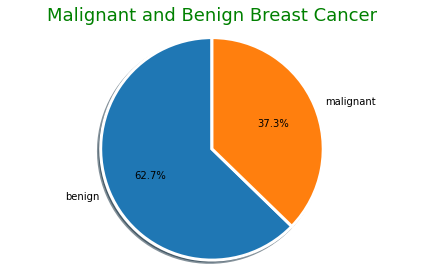

In [3]:
# Compute the target's class distribution 
# Change 1 as malignant and 0 as benign (opposite)
df_cancer['target'] = np.where(df_cancer['target'] == 0, 1, 0)
print(df_cancer['target'].value_counts().astype(int))
target = df_cancer['target'].value_counts().astype(int)
target.index = ['benign', 'malignant']
print(target)

# Pie chart
fig1, ax1 = plt.subplots()
ax1.pie(target, labels=target.index, autopct='%1.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Malignant and Benign Breast Cancer', fontsize=18, color = "green")
plt.tight_layout()

#### Split data into training and test set

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into the data (X) and the labels (y)
X = df_cancer.drop('target', axis=1)
y = df_cancer['target']
print('X shape: ', X.shape)
print('y shape: ', y.shape)
# Split X and y into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print('X train shape: ', X_train.shape, '\ny train shape: ', y_train.shape,'\nX test shape: ', X_test.shape, '\ny test shape: ', y_test.shape)

X shape:  (569, 30)
y shape:  (569,)
X train shape:  (455, 30) 
y train shape:  (455,) 
X test shape:  (114, 30) 
y test shape:  (114,)


In [5]:
y_test.value_counts().astype(int)

0    67
1    47
Name: target, dtype: int64

## **Classification**

The use of accuracy, the most common metric for evaluating classification models, may bring some issues. When addressing this classification problem, an important consideration has to be made. The accuracy of an ML model describes how many data points were detected correctly and is formally defined as: 

$Accuracy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}$

This metric weights both false positive and false negative observations the same. Since, in this particular study, we are considering the classification of breast cancer, we have to be cautious when considering such a metric. The misclassification of a person with cancer carries more dangerous implications than that of a healthy patient. What if a patient has cancer, but no treatment is given because our model predicted so? (That is a situation we would like to avoid!)

Once we make this important consideration, the use of the recall (or sensitivity), which is another metric for the evaluation of classification models, makes more sense. The recall describes how many true positives were recalled (found) by the model. It is calculated by dividing the true positives by the total actual positive. 

$Recall = \frac{True Positive}{True Positive + False Negative}$

Recall should be the model metric we use to select our best model when there is a high cost associated with False Negative (as in this case).

#### Imports

In [6]:
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
# Grid search + metric
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#### Functions

Define a dictionary with some classifies and their parameters grids for tuning hyperparameters (using GridSearchCV).

In [7]:
estimators_and_par = {
    'KNN': [KNeighborsClassifier(), {'n_neighbors': list(range(1, 100, 3))}],
    'NAIVE BAYES': [GaussianNB(), {'var_smoothing': np.logspace(0,-9, num=100)}],
    'LOGISTIC REGRESSION': [LogisticRegression(), {'solver': ['newton-cg'], 'C':[0.001, 0.01, 0.1, 1, 5, 10, 15, 100], 'max_iter':[5000]}],
    'DECISION TREE': [DecisionTreeClassifier(), {'criterion': ['gini', 'entropy'], 'max_depth': list(range(1,12,3)), 'random_state':[14]}],
    'RANDOM FORESTS': [RandomForestClassifier(), {'bootstrap': [True], 'max_depth': [5, 10, 20], 'min_samples_leaf': [4, 6, 10], 'min_samples_split': [7,10,15], 'n_estimators': [100, 500, 750], 'random_state':[14]}],
    'ADABOOST': [AdaBoostClassifier(), {'n_estimators':[10, 100, 250, 500, 1000, 2000],'learning_rate':[0.001,0.01, 0.1]}],
    'GRADIENT BOOSTING' : [GradientBoostingClassifier(), {"n_estimators":[250, 500, 1000, 2000], "max_depth":list(range(1,12,3)), "learning_rate":[0.01,0.1,1,10,100]}],
    'NEURAL NETWORK ' : [MLPClassifier(max_iter = 10000), {"hidden_layer_sizes": [25, 75, 100, 150], "activation": ["logistic", "tanh", "relu"], "solver": ["sgd", "adam"], 'alpha': [0.0001, 0.001, 0.05,], 'learning_rate': ['constant','adaptive']}]
}

In [8]:
def table_bestmodel(estimators, recall = False):
    """Funtion that outputs a table comparing the best performing models after conducting hyperparameter tuning. 
    Parameters:
    - estimators: dictionary of the classification models and parameters grid to use in GridSearchCV() (see cell above for an example of the structure
    - recall: if False (Default) computes a GridSearchCV based on accuracy, while if True does so based on recall"""
    global X_train, y_train, X_test, y_test
    info_dict = {}
    if recall == False: 
        for key, value in estimators.items():
            gs_acc = GridSearchCV(estimator=value[0], param_grid=value[1], cv=5, scoring='accuracy', refit=True, n_jobs=-1)
            gs_acc.fit(X_train,y_train)
            model_BEST = gs_acc.best_estimator_
            model_BEST.fit(X_train, y_train)
            y_pred_acc= model_BEST.predict(X_test)
            info_dict[key] = {'Train acc.': gs_acc.best_score_, 'Test acc.': metrics.accuracy_score(y_test, y_pred_acc), 'Test Rec.' : metrics.recall_score(y_test, y_pred_acc), 'Best Model': gs_acc.best_estimator_, }
        df_acc = pd.DataFrame(info_dict)
        df_acc = df_acc.T
        df_acc.columns = ["Train Acc.", "Test Acc.", 'Test Rec.', "Best Model"]
        print(tabulate(df_acc, headers="keys", tablefmt='fancy_grid'))
    else:
        for key, value in estimators.items():
            gs_rec = GridSearchCV(estimator=value[0], param_grid=value[1], cv=5, scoring='recall', refit=True, n_jobs=-1)
            gs_rec.fit(X_train,y_train)
            model_BEST = gs_rec.best_estimator_
            model_BEST.fit(X_train, y_train)
            y_pred_rec =model_BEST.predict(X_test)
            info_dict[key] = {'Train rec.': gs_rec.best_score_, 'Test rec.' : metrics.recall_score(y_test, y_pred_rec), 'Test acc.': metrics.accuracy_score(y_test, y_pred_rec), 'Best Model': gs_rec.best_estimator_, }
        df_rec = pd.DataFrame(info_dict)
        df_rec = df_rec.T
        df_rec.columns = ["Train Rec.", "Test Rec.", 'Test Acc.', "Best Model"]
        print(tabulate(df_rec, headers="keys", tablefmt='fancy_grid'))

In [9]:
def model_plots(model):
    """Funtion that, given a model, plots its confusion matrix (also some other metrics). 
    Parameters:
    - model: classification model we want the confusion matrix of"""
    global X_train, y_train, X_test, y_test
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # Model's Accuracy 
    print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred))
    print('Test Precision: ', metrics.precision_score(y_test, y_pred))
    print('Test Recall: ', metrics.recall_score(y_test, y_pred))
    
    # Plot the Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    fig = plt.subplots(figsize=(18, 7))
    plot = sns.heatmap(cm, annot=True, fmt='g',cmap='plasma', linewidth=1)  
    plot.set_xlabel('Predicted labels')
    plot.set_ylabel('True labels')
    plot.set_title('Confusion Matrix: ')
    plot.xaxis.set_ticklabels(['Benign', 'Malignant'])
    plot.yaxis.set_ticklabels(['Benign', 'Malignant'])
    plt.show()

In [10]:
def model_ROC_plots(model1, model2):
    """Funtion that, given two models, plots their ROC curve (for comparison) and the Random prediction ROC curve. 
    Parameters:
    - model1, model2: classification models we want the ROC curve of"""
    global X_train, y_train, X_test, y_test
    # Model 1
    model1.fit(X_train,y_train)
    y_pred_proba1 = model1.predict_proba(X_test)[::,1]
    fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
    auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
    # Model 2
    model2.fit(X_train,y_train)
    y_pred_proba2 = model2.predict_proba(X_test)[::,1]
    fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
    auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
    # Random Prediction
    r_probs = [0 for _ in range(len(y_test))]
    r_auc = metrics.roc_auc_score(y_test, r_probs)
    r_fpr, r_tpr, _ = metrics.roc_curve(y_test, r_probs)

    plt.figure(figsize=(10,10))
    plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
    plt.plot(fpr1, tpr1, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % auc1)
    plt.plot(fpr2, tpr2, marker='.', label='Logistic Regression (AUROC = %0.3f)' % auc2)
    plt.title('ROC Plot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 17}) 
    plt.show()

In [23]:
def perf_summary_plot(model, title):
    """Funtion that, given a model, plots a performance summary plot (similar meaning to the confusion matrix plot). 
    Parameters:
    - model: classification models we want the plot of
    - title (string): tile of the plot"""
    # Create scores
    ben_train_X = X_train[y_train==0]
    ben_train_y = y_train[y_train==0]
    mal_train_X = X_train[y_train==1]
    mal_train_y = y_train[y_train==1]
    ben_test_X = X_test[y_test==0]
    ben_test_y = y_test[y_test==0]
    mal_test_X = X_test[y_test==1]
    mal_test_y = y_test[y_test==1]
    scores = [model.score(mal_train_X, mal_train_y), model.score(ben_train_X, ben_train_y), model.score(mal_test_X, mal_test_y), model.score(ben_test_X, ben_test_y)]
    # Plot
    plt.figure()
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868']) # scores as a bar chart
    for bar in bars: # directly label the score onto the bars
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), ha='center', color='w', fontsize=11)
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove ticks 
    for spine in plt.gca().spines.values(): # remove the frame of the chart
        spine.set_visible(False)
    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title(title, alpha=0.8)

### Models

##### Best performances table (accuracy-based)

In [12]:
print('-- Trained for best ACCURACY --')
table_bestmodel(estimators_and_par, recall = False)

-- Trained for best ACCURACY --
╒═════════════════════╤══════════════╤═════════════╤═════════════╤══════════════════════════════════════════════════════════════════════════════╕
│                     │   Train Acc. │   Test Acc. │   Test Rec. │ Best Model                                                                   │
╞═════════════════════╪══════════════╪═════════════╪═════════════╪══════════════════════════════════════════════════════════════════════════════╡
│ KNN                 │     0.936264 │    0.964912 │    0.93617  │ KNeighborsClassifier(n_neighbors=13)                                         │
├─────────────────────┼──────────────┼─────────────┼─────────────┼──────────────────────────────────────────────────────────────────────────────┤
│ NAIVE BAYES         │     0.945055 │    0.929825 │    0.914894 │ GaussianNB(var_smoothing=1.519911082952933e-09)                              │
├─────────────────────┼──────────────┼─────────────┼─────────────┼──────────────────────────

Test Accuracy:  0.9824561403508771
Test Precision:  1.0
Test Recall:  0.9574468085106383


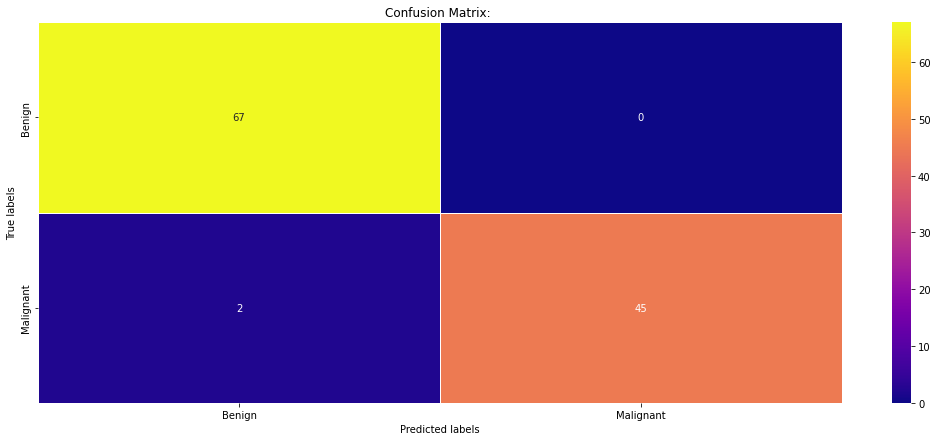

In [14]:
best_acc = GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=500)
model_plots(best_acc)

##### Best performances table (recall-based)

In [13]:
print('-- Trained for best RECALL --')
table_bestmodel(estimators_and_par, recall = True)

-- Trained for best RECALL --
╒═════════════════════╤══════════════╤═════════════╤═════════════╤═════════════════════════════════════════════════════════════════════════════════╕
│                     │   Train Rec. │   Test Rec. │   Test Acc. │ Best Model                                                                      │
╞═════════════════════╪══════════════╪═════════════╪═════════════╪═════════════════════════════════════════════════════════════════════════════════╡
│ KNN                 │     0.872727 │    0.93617  │    0.964912 │ KNeighborsClassifier(n_neighbors=13)                                            │
├─────────────────────┼──────────────┼─────────────┼─────────────┼─────────────────────────────────────────────────────────────────────────────────┤
│ NAIVE BAYES         │     0.884848 │    0.914894 │    0.929825 │ GaussianNB(var_smoothing=1.519911082952933e-09)                                 │
├─────────────────────┼──────────────┼─────────────┼─────────────┼──────────

Test Accuracy:  0.9824561403508771
Test Precision:  0.9591836734693877
Test Recall:  1.0


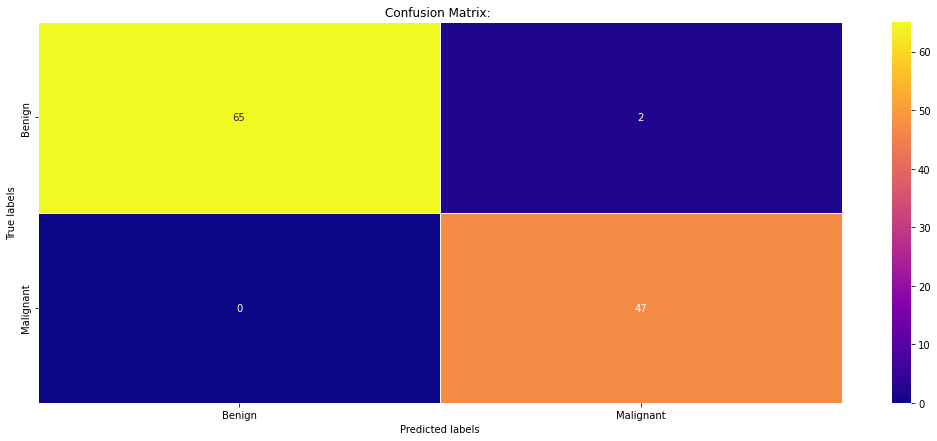

In [26]:
best_rec = LogisticRegression(C=100, max_iter=5000, solver='newton-cg') 
model_plots(best_rec)

##### ROC curve comparison

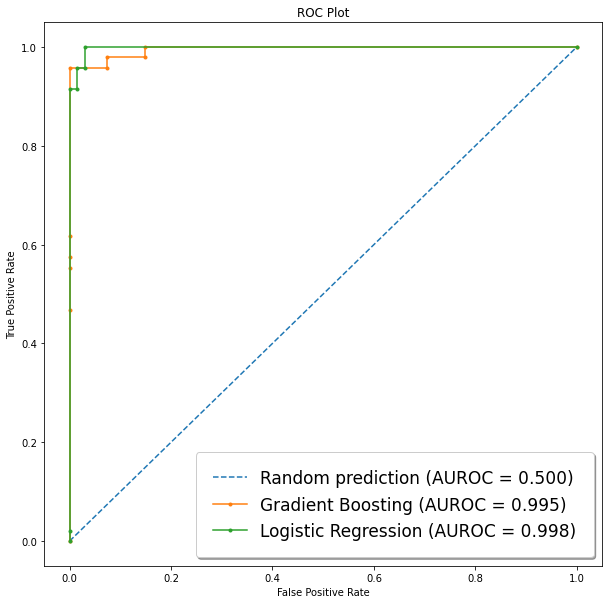

In [27]:
model_ROC_plots(best_acc, best_rec)

#### Performance Summary Plot

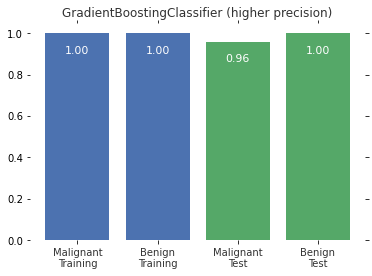

In [67]:
perf_summary_plot(best_acc, title = "GradientBoostingClassifier (higher precision)")

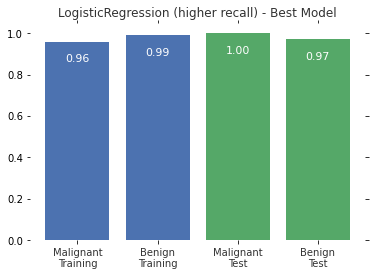

In [68]:
perf_summary_plot(best_rec, title = "LogisticRegression (higher recall) - Best Model")

The performance is the same between Gradient Boosting and Logistic Regression in terms of accuracy. The former has higher precision, while the latter has a better recall. Since, as we highlighted before, recall is the most appropriate metric in this study, we prefer the Logistic model.